<a href="https://colab.research.google.com/github/William-Muko/CR7-Goals-EDA/blob/main/Cristiano_Ronaldo_Goals_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SULTAN OF THE STEPOVER EDA 

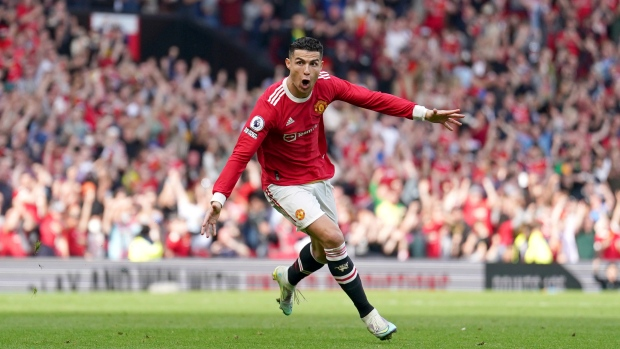

Cristiano Ronaldo dos Santos Aveiro is a Portuguese professional footballer who plays as a forward for Premier League club Manchester United and Captains the Portugal National team.He first played for Clube Desportivo Nacional of  Madeira and then transferred to Sporting Clube de Portugal(Known as Sporting Lisbon), making his debut on Sporting's first team in 2002.

After a successful season with Sporting, Ronaldo signed with Manchester  United in 2003 he became an instant sensation and regarded the best forwards in the game. His finest season with United came in 2007-08, when he won the Golden Boots award as Europe's leading scorer, with 31 League goals. After helping United to a Champions League title in May 2008. The dataset for this analysis was obtained from kaggle, and credits to Azminetoushikwasi(Tommy Shelby) a Kaggle Master for inspiring this great study.

# Data Loading

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data.csv')
df_o = pd.read_csv('overall.csv')

## Basic Exploration

In [4]:
df.head(10)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,NaN
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3:0,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,NaN,88,1:2,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,NaN,67,3:0,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,NaN,13,3:0,NaN,NaN
5,03/04,Premier League,11,11/1/03,H,Manchester United,Portsmouth FC,3:0,RW,80,2:0,Direct free kick,NaN
6,03/04,FA Cup,Fifth Round,2/14/04,H,Manchester United,Manchester City,4:2,RW,74,3:0,Right-footed shot,NaN
7,03/04,Premier League,29,3/20/04,H,Manchester United,Tottenham Hotspur,3:0,NaN,89,2:0,Right-footed shot,NaN
8,03/04,Premier League,32,4/10/04,A,Manchester United,Birmingham City,1:2,NaN,60,1:1,Header,Ryan Giggs
9,03/04,Premier League,38,5/15/04,A,Manchester United,Aston Villa,0:2,NaN,4,0:1,Right-footed shot,NaN


In [5]:
df.tail(10)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
688,21/22,Premier League,18,2/15/22,H,Manchester United,Brighton & Hove Albion,2:0,CF,51,1:0,Right-footed shot,Scott McTominay
689,21/22,Premier League,29,3/12/22,H,Manchester United,Tottenham Hotspur,3:2,CF,12,1:0,Right-footed shot,Fred
690,21/22,Premier League,29,3/12/22,H,Manchester United,Tottenham Hotspur,3:2,CF,38,2:1,Right-footed shot,Jadon Sancho
691,21/22,Premier League,29,3/12/22,H,Manchester United,Tottenham Hotspur,3:2,CF,81,3:2,Header,Alex Telles
692,21/22,Premier League,33,4/16/22,H,Manchester United,Norwich City,3:2,CF,7,1:0,Right-footed shot,Anthony Elanga
693,21/22,Premier League,33,4/16/22,H,Manchester United,Norwich City,3:2,CF,32,2:0,Header,Alex Telles
694,21/22,Premier League,33,4/16/22,H,Manchester United,Norwich City,3:2,CF,76,3:2,Direct free kick,NaN
695,21/22,Premier League,34,4/23/22,A,Manchester United,Arsenal FC,3:1,CF,34,2:1,Left-footed shot,Nemanja MatiÄ‡
696,21/22,Premier League,37,4/28/22,H,Manchester United,Chelsea FC,1:1,CF,62,1:1,Right-footed shot,Nemanja MatiÄ‡
697,21/22,Premier League,35,5/2/22,H,Manchester United,Brentford FC,3:0,CF,61,2:0,Penalty,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            698 non-null    object
 1   Competition       698 non-null    object
 2   Matchday          698 non-null    object
 3   Date              698 non-null    object
 4   Venue             698 non-null    object
 5   Club              698 non-null    object
 6   Opponent          698 non-null    object
 7   Result            698 non-null    object
 8   Playing_Position  641 non-null    object
 9   Minute            698 non-null    object
 10  At_score          698 non-null    object
 11  Type              683 non-null    object
 12  Goal_assist       458 non-null    object
dtypes: object(13)
memory usage: 71.0+ KB


In [7]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Season,20
Competition,15
Matchday,52
Date,461
Venue,2
Club,4
Opponent,124
Result,51
Playing_Position,6
Minute,106


In [8]:
df.describe(include=['object']).T

,count,unique,top,freq
Season,698,20,14/15,61
Competition,698,15,LaLiga,311
Matchday,698,52,Group Stage,73
Date,698,461,9/12/15,5
Venue,698,2,H,402
Club,698,4,Real Madrid,450
Opponent,698,124,Sevilla FC,27
Result,698,51,3:0,49
Playing_Position,641,5,LW,356
Minute,698,106,90,17


# Exploratory Data Analysis Of Club Goals

## Goals Per Competititon

In [9]:
px.histogram(
    df,
    x='Competition',
    title="Goals per competition",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Club'])

In [10]:
pd.DataFrame(df.Competition.value_counts())

,Competition
LaLiga,311
UEFA Champions League,140
Premier League,102
Serie A,81
Copa del Rey,22
FA Cup,13
FIFA Club World Cup,7
EFL Cup,4
Supercopa,4
Italy Cup,4


## Goals Per Season

In [11]:
px.histogram(
    df,
    x='Season',
    title="Goals per season",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Season','Club'])

## Goals Per Clubs

In [12]:
px.histogram(
    df,
    x='Club',
    title="Goals per Clubs - Seasons",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Season',
    hover_name='Season',
    hover_data=['Competition','Season','Club'])

In [13]:
px.histogram(
    df,
    x='Club',
    title="Goals per Clubs - Competition",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Competition',
    hover_name='Competition',
    hover_data=['Competition','Season','Club'])

### Goals Per Playing position

In [14]:
px.histogram(
    df,
    x='Playing_Position',
    title="Goals per playing Position",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

### Goals per Game Minutes

In [15]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")
df.loc[df.Minute.str[:3]=='45+', 'Minute'] = '1stE'
df.loc[df.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
df.loc[df.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'
mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]


Text(0.5, 1.0, 'Goals per Game Minute (1-23)')

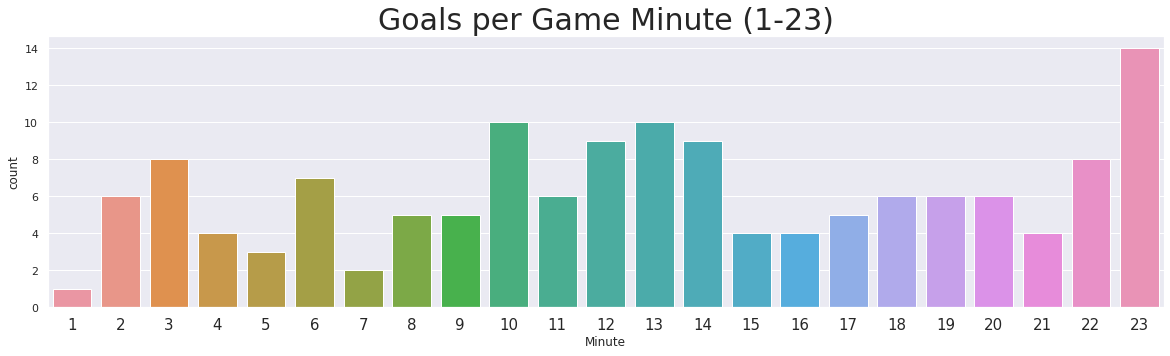

In [16]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15)
p=sns.countplot(df['Minute'],order=mins1)
p.axes.set_title("Goals per Game Minute (1-23)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (24-First Half Extra time)')

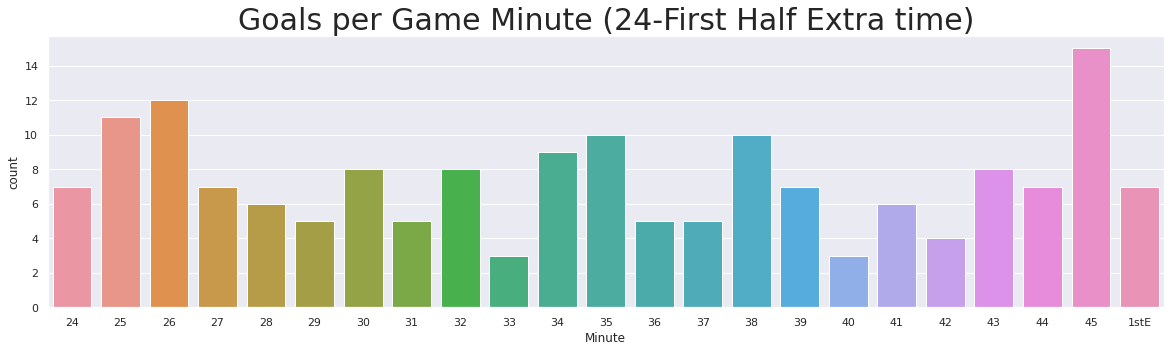

In [17]:
p=sns.countplot(df['Minute'],order=mins2)
p.axes.set_title("Goals per Game Minute (24-First Half Extra time)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (46-68)')

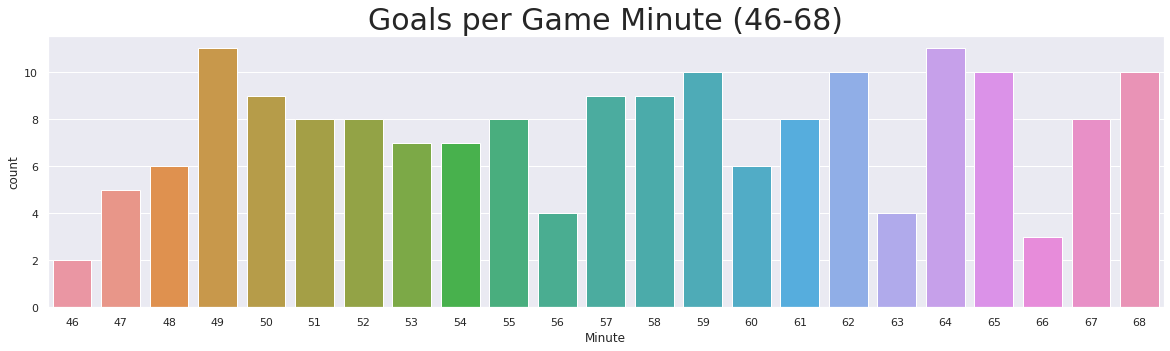

In [18]:
p=sns.countplot(df['Minute'],order=mins3)
p.axes.set_title("Goals per Game Minute (46-68)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute 69- 2nd Half Extra time)')

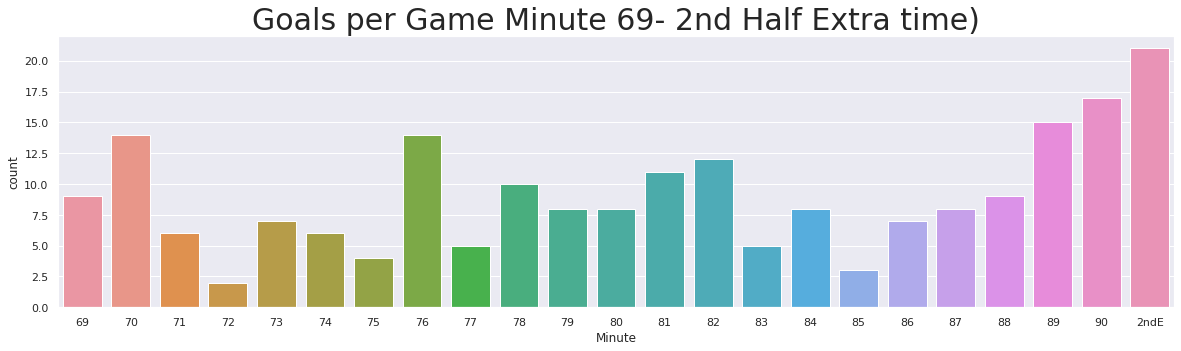

In [19]:
p=sns.countplot(df['Minute'],order=mins4)
p.axes.set_title("Goals per Game Minute 69- 2nd Half Extra time)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (91-Extra times)')

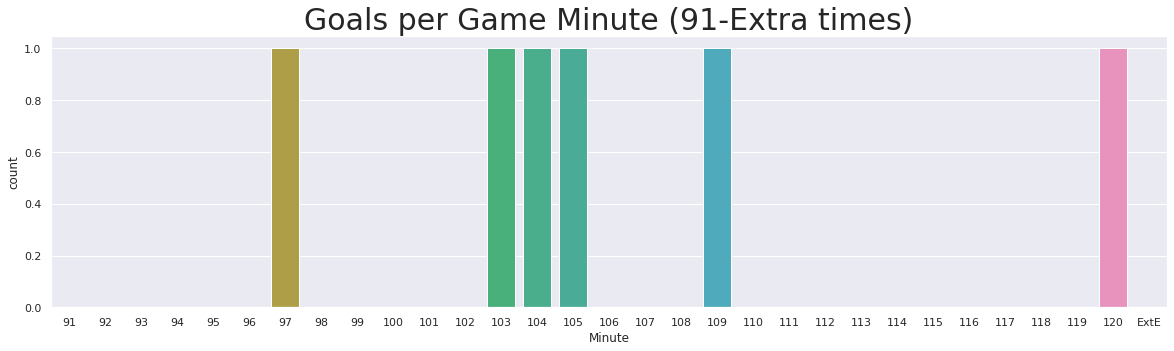

In [20]:
p=sns.countplot(df['Minute'],order=mins5)
p.axes.set_title("Goals per Game Minute (91-Extra times)",fontsize=30)

He scored in all 90 game minutes!

### Goals per Type of Goals

In [21]:
px.histogram(
    df,
    x='Type',
    title="Goals per Type",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

### Scoreline After Goals

Text(0.5, 1.0, 'Scoresheet after scoring')

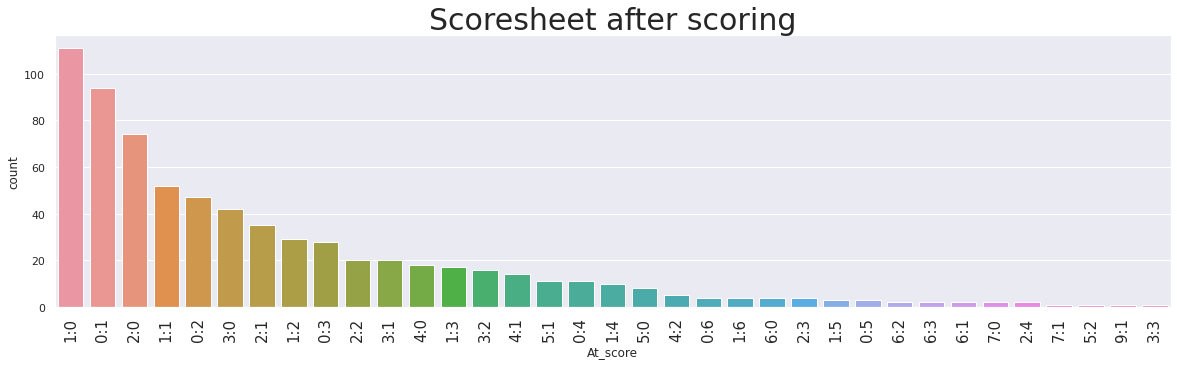

In [22]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['At_score'],hue_order=df.groupby('Competition'),order=df.At_score.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Scoresheet after scoring",fontsize=30)

# Opponets

Text(0.5, 1.0, 'Goals per Opponent')

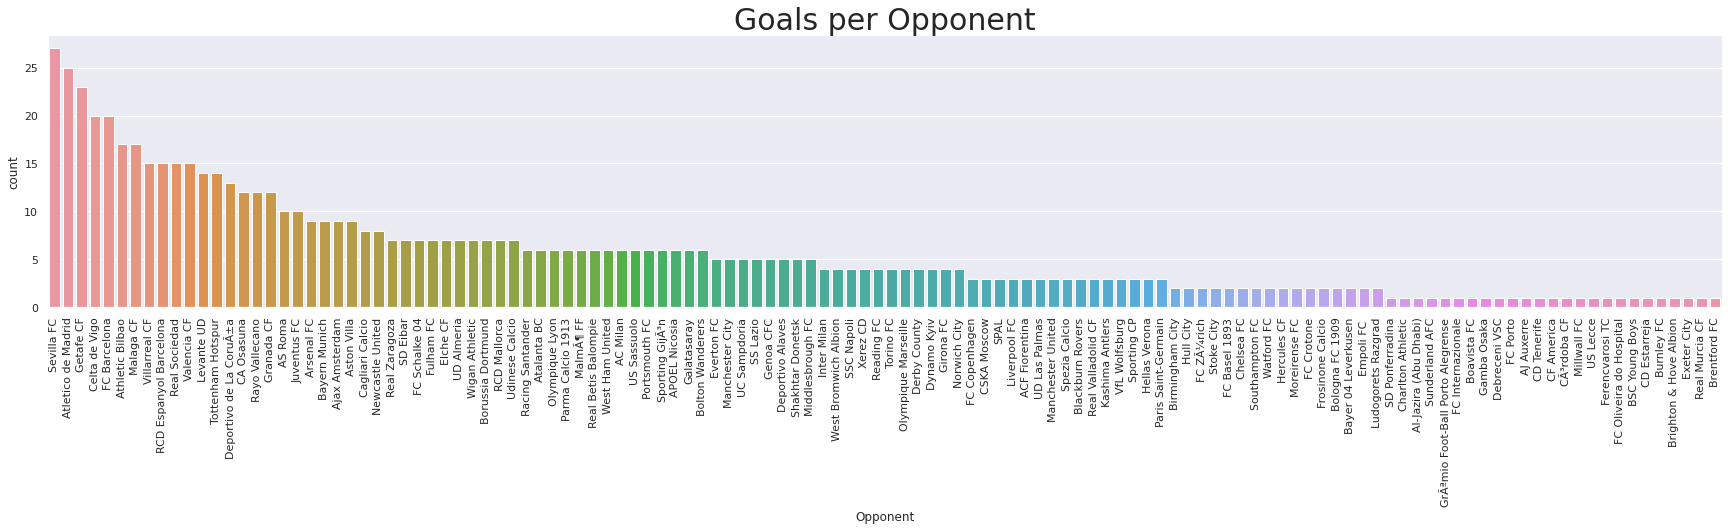

In [23]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(rotation='vertical')
p=sns.countplot(df['Opponent'],hue_order=df.groupby('Competition'),order=df.Opponent.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Opponent",fontsize=30)

In [24]:
mins=list(map(str, df.Opponent.value_counts().sort_values(ascending=False).index))
for min in df['Opponent']:
    if min not in mins:
        mins.append(min)
mins1=mins[:int(len(mins)/5)]
mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5=mins[int(4*len(mins)/5):]

Text(0.5, 1.0, 'Goals per Opponents')

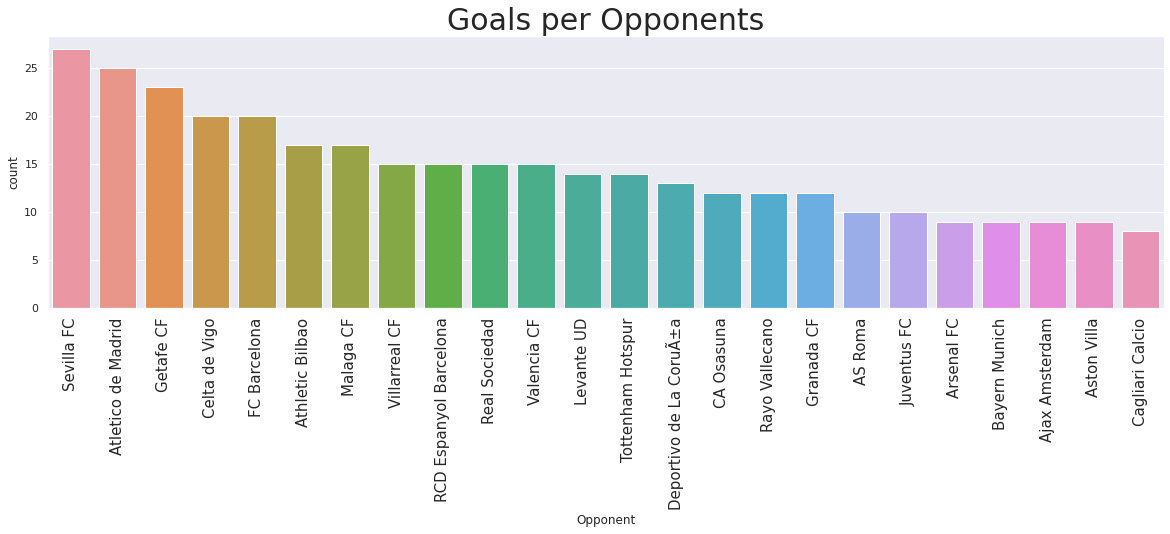

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins1)
p.axes.set_title("Goals per Opponents",fontsize=30)

Text(0.5, 1.0, 'Goals per Opponents')

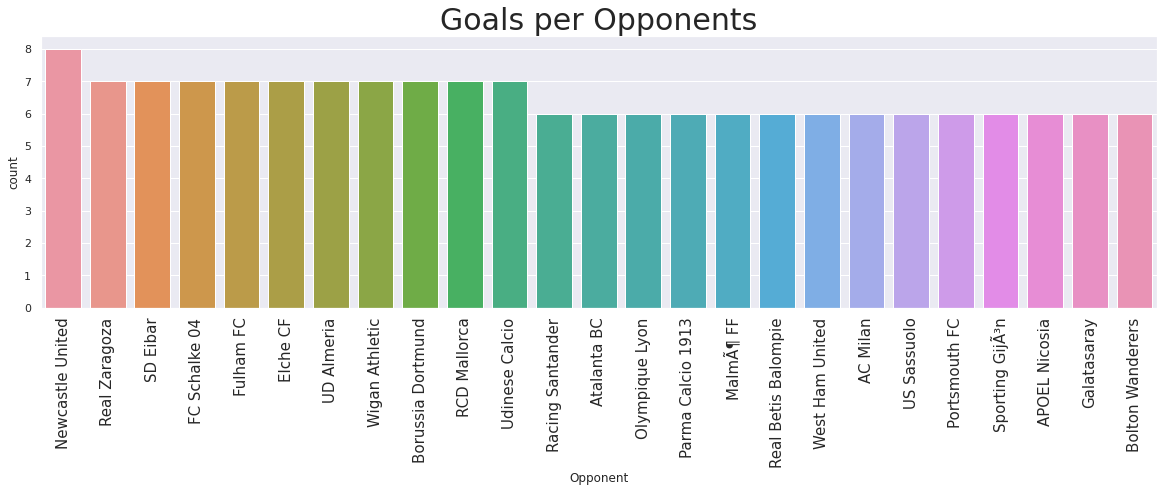

In [26]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins2)
p.axes.set_title("Goals per Opponents",fontsize=30)

Text(0.5, 1.0, 'Goals per Opponents')

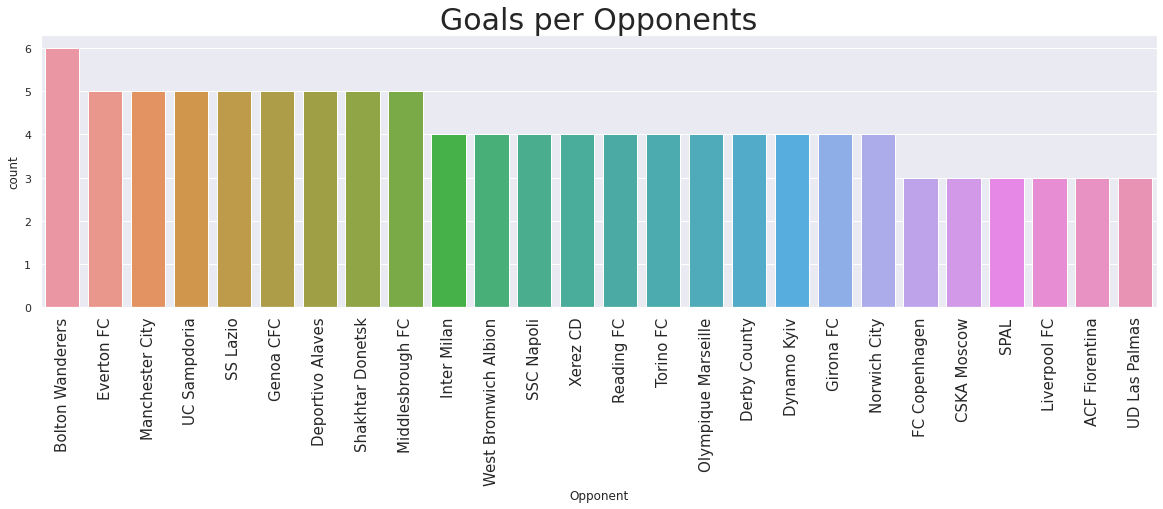

In [27]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins3)
p.axes.set_title("Goals per Opponents",fontsize=30)

Text(0.5, 1.0, 'Goals per Opponents')

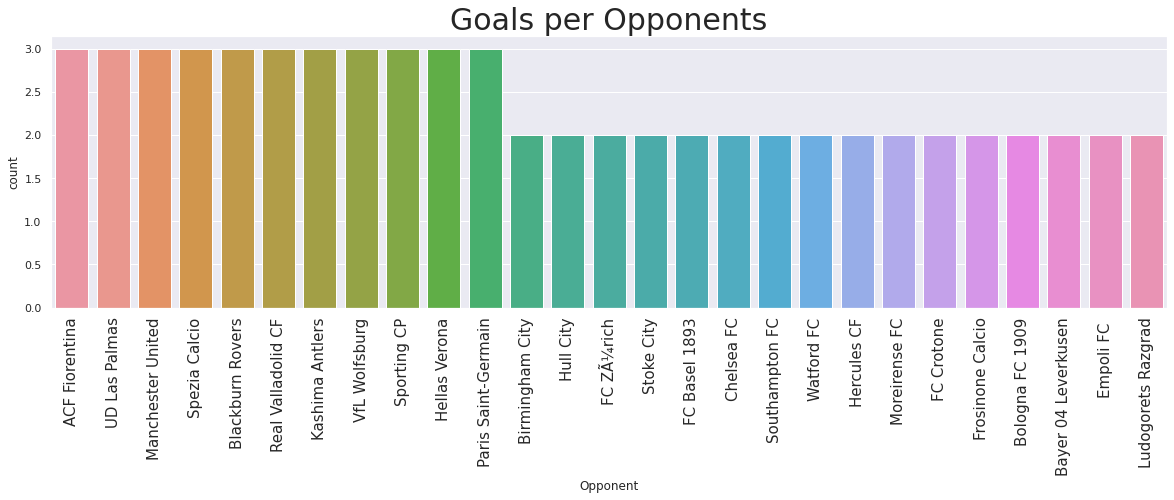

In [28]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins4)
p.axes.set_title("Goals per Opponents",fontsize=30)

Text(0.5, 1.0, 'Goals per Opponents')

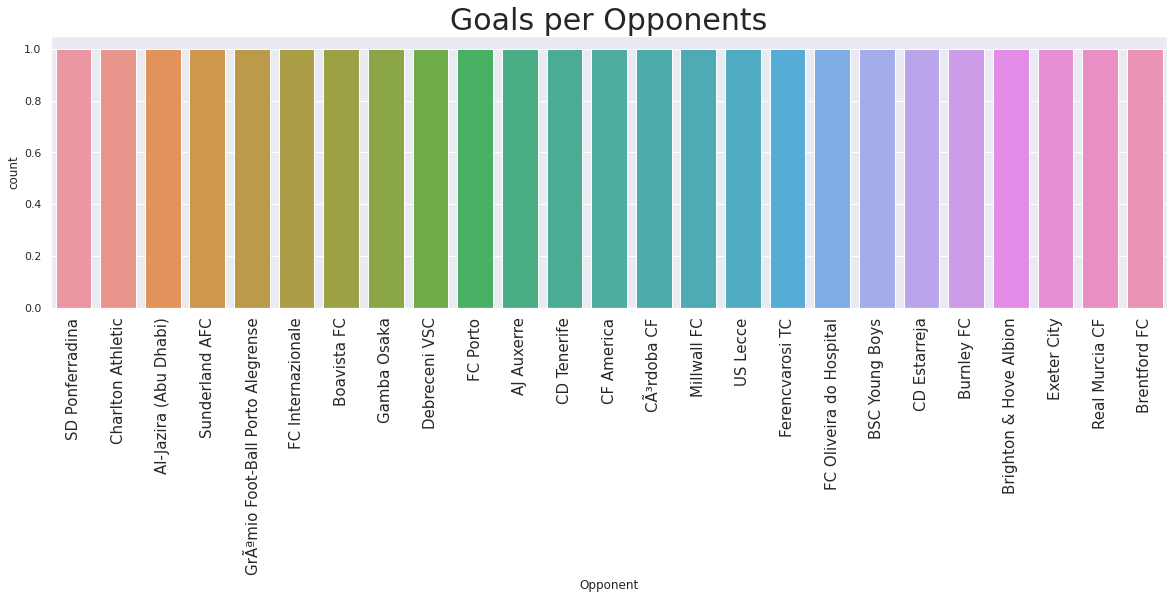

In [29]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins5)
p.axes.set_title("Goals per Opponents",fontsize=30)

# Favorite Opponents

<BarContainer object of 7 artists>

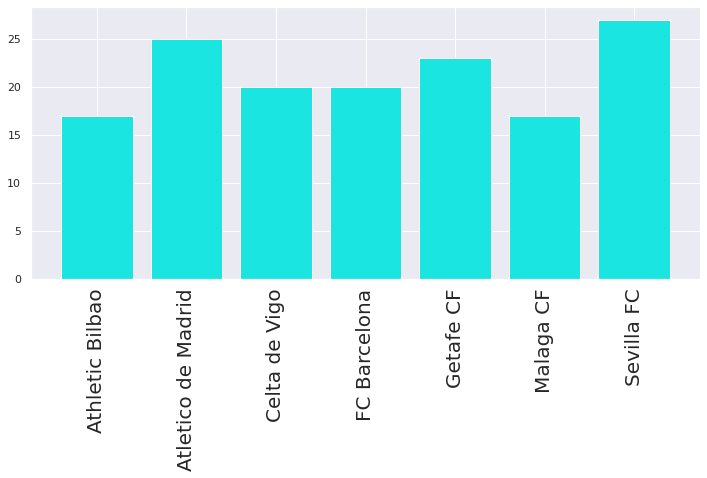

In [30]:
sns.set(rc={'figure.figsize':(12,5)})
opponents_df=df.groupby('Opponent').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=20,rotation='vertical')
plt.bar(x=fav_opponents_df['Opponent'],height=fav_opponents_df['count'],color="#1ae5e1")

### Assisted By

Text(0.5, 1.0, 'Goals Assist')

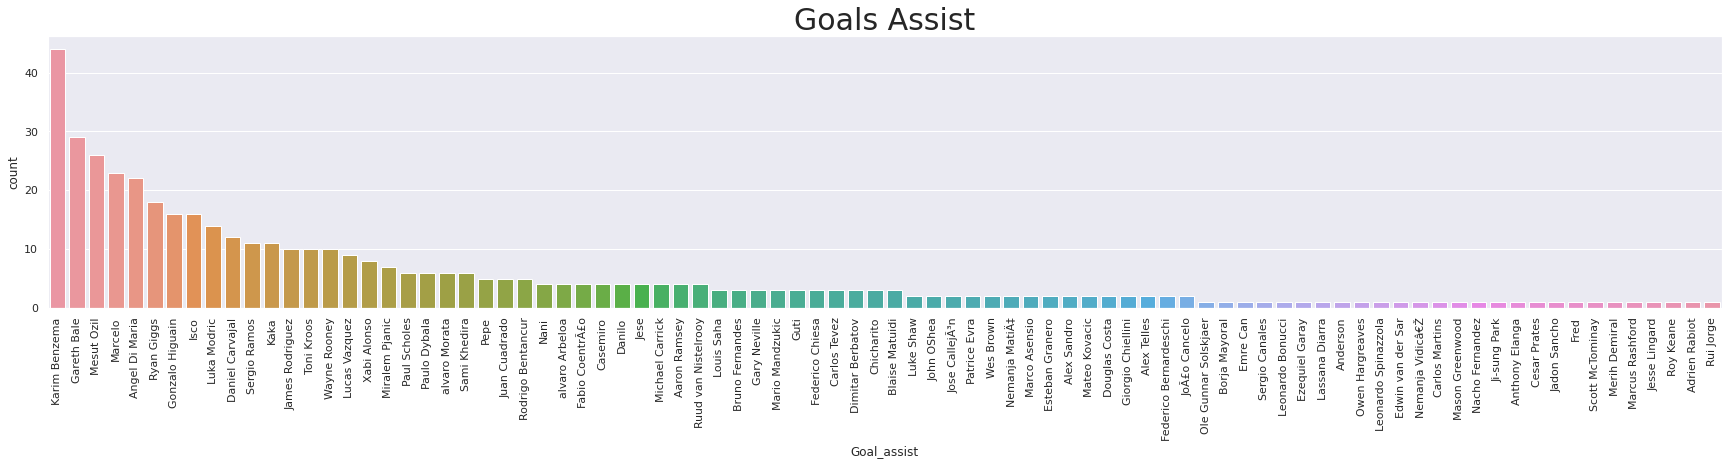

In [31]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=df.Goal_assist.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals Assist",fontsize=30)

In [32]:
mins=list(map(str, df.Goal_assist.value_counts().sort_values(ascending=False).index))
for min in df['Goal_assist']:
    if min not in mins:
        mins.append(min)
mins1=mins[:int(len(mins)/5)]
mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5=mins[int(4*len(mins)/5):]

Text(0.5, 1.0, 'Goals Assisted by')

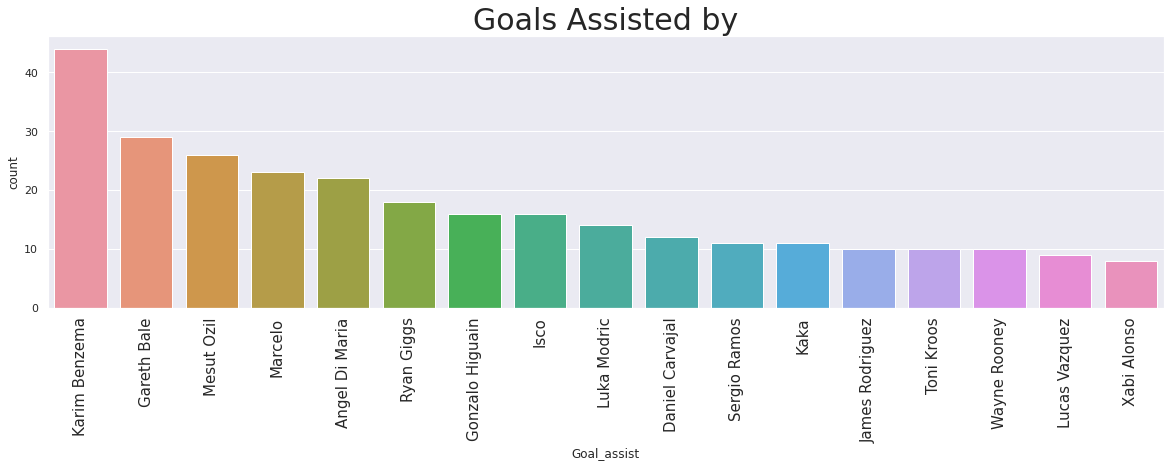

In [33]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins1)
p.axes.set_title("Goals Assisted by",fontsize=30)

Text(0.5, 1.0, 'Goals Assisted by')

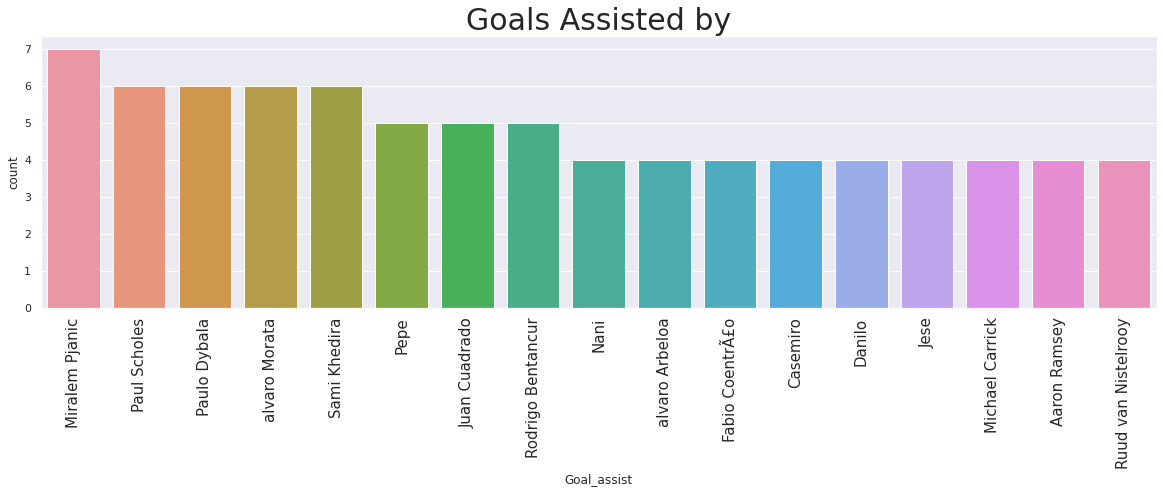

In [34]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins2)
p.axes.set_title("Goals Assisted by",fontsize=30)

Text(0.5, 1.0, 'Goals Assisted by')

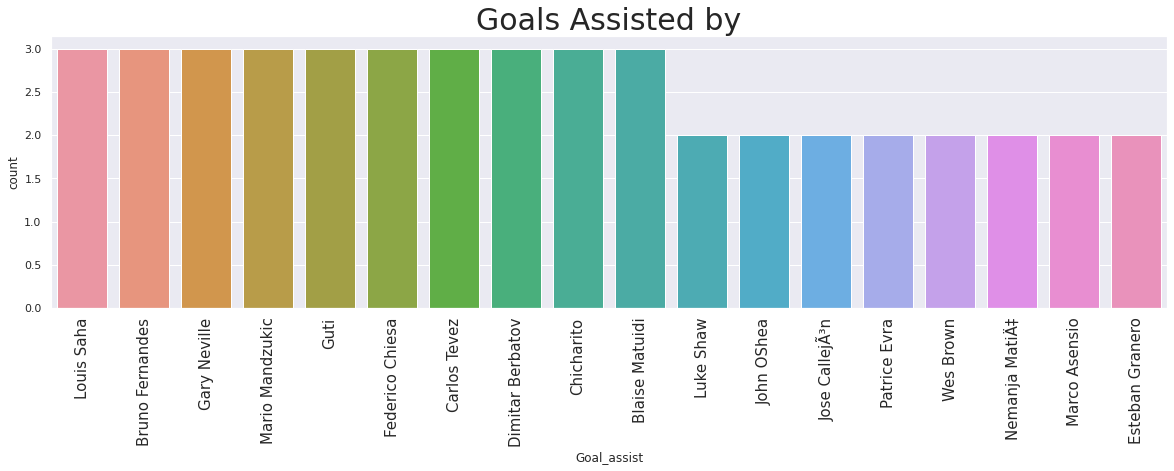

In [35]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins3)
p.axes.set_title("Goals Assisted by",fontsize=30)

Text(0.5, 1.0, 'Goals Assisted by')

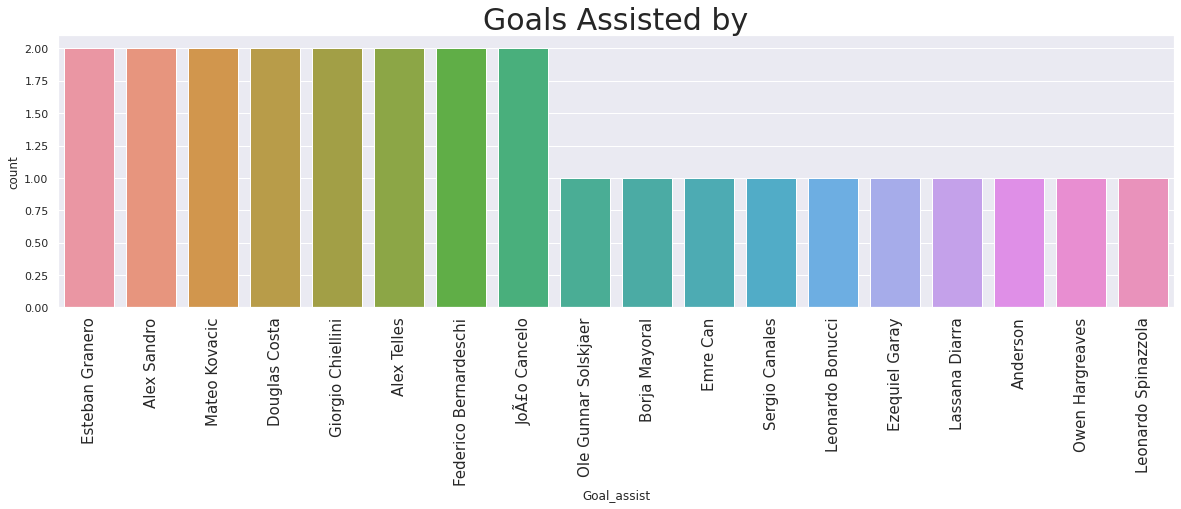

In [36]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins4)
p.axes.set_title("Goals Assisted by",fontsize=30)

Text(0.5, 1.0, 'Goals Assisted by')

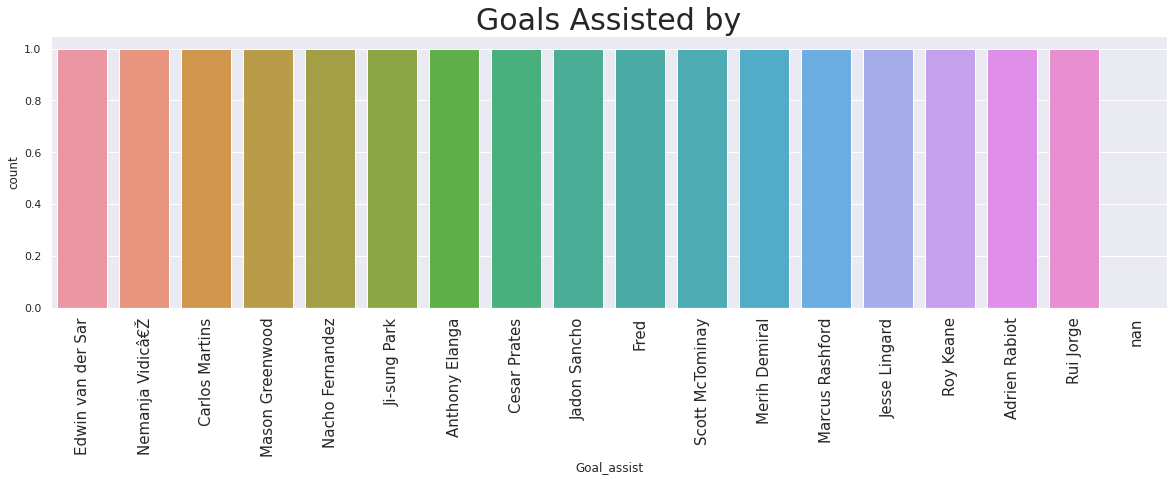

In [37]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins5)
p.axes.set_title("Goals Assisted by",fontsize=30)

# Goals per Venue

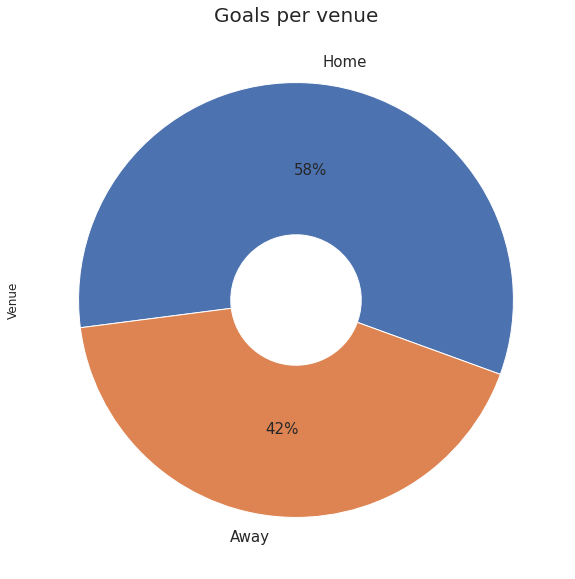

In [38]:
plt.figure(figsize=(30,10))
plt.title('Goals per venue', fontsize=20)
df.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

# Career Goals Analysis

## Career Match Stats

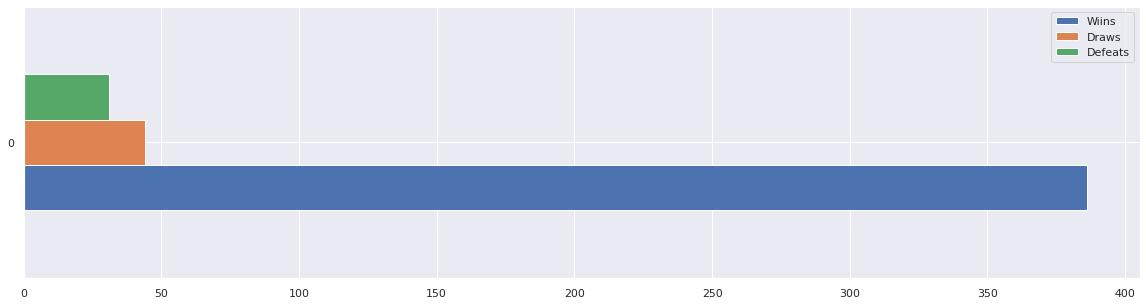

In [39]:
df_o[["Wiins","Draws","Defeats"]].plot(kind = 'barh')

### Match Winning Goals

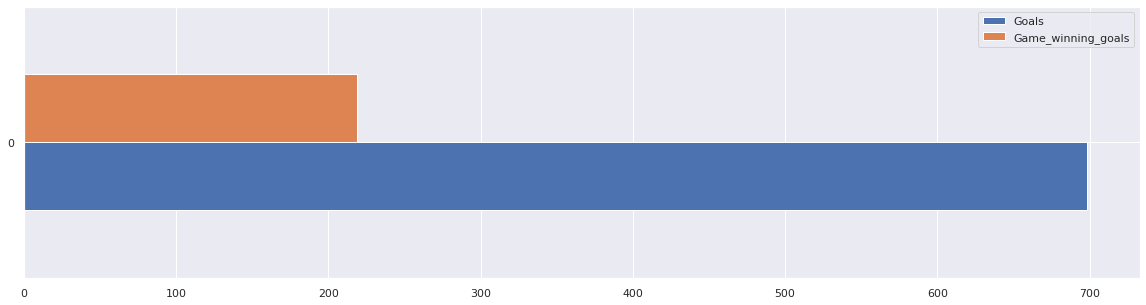

In [40]:
df_o[["Goals","Game_winning_goals"]].plot(kind = 'barh')

## Goal Timeline Analysis

### Goal Trendline

In [41]:
dfl = df[['Date']]
dfl['Date'] = pd.to_datetime(dfl['Date']).dt.strftime('%y-%m-%d')
dfl['Goal_no']=list(range(1,699))
dfl['Goal']=list(1 for i in range(1,699))
# dfl= dfl.set_index("Date")

In [42]:
trace1 = go.Scatter(x=dfl.Date,
                    y=dfl.Goal_no,
                    name = "CR7 Total Goals Time graph",
                    line = dict(color = 'blue'),
                    opacity = 0.4)

layout = dict(title='CR7 Goals',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)